<a href="https://colab.research.google.com/github/Rahatrezaaa/DL-Tensorflow-/blob/master/callbacks%20and%20loss/accuracy%20curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [0]:
#importing fashion mnist dataset
mnist=tf.keras.datasets.fashion_mnist

In [0]:
#loading the data 
(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

In [0]:
#Noramlizing
training_images=training_images/255.0
test_images=test_images/255.0

In [0]:
#####Callbacks
#I would like to stop the training when I reach a desired value.
class mycallback((tf.keras.callbacks.Callback)):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('acc')>0.90):         
      print("\nReached 90% accuracy so cancelling training!")     #we can also do this in terms of loss.   "logs.get('loss')<0.1" 
      self.model.stop_training = True

callbacks = mycallback()


In [0]:
model=tf.keras.Sequential([tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(1024,activation=tf.nn.relu),
                           tf.keras.layers.Dense(512,activation=tf.nn.relu),
                           tf.keras.layers.Dense(256,activation=tf.nn.relu),
                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                           ])

In [0]:
#compiling the model
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
history=model.fit(training_images,training_labels,epochs=20,validation_split=0.2,callbacks=[callbacks])


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 88us/sample - loss: 0.4925 - acc: 0.8210 - val_loss: 0.4478 - val_acc: 0.8393
Epoch 2/20
48000/48000 [==============================] - 4s 85us/sample - loss: 0.3742 - acc: 0.8633 - val_loss: 0.4131 - val_acc: 0.8450
Epoch 3/20
48000/48000 [==============================] - 4s 86us/sample - loss: 0.3332 - acc: 0.8782 - val_loss: 0.3519 - val_acc: 0.8733
Epoch 4/20
48000/48000 [==============================] - 4s 85us/sample - loss: 0.3123 - acc: 0.8835 - val_loss: 0.3665 - val_acc: 0.8655
Epoch 5/20
48000/48000 [==============================] - 4s 83us/sample - loss: 0.2933 - acc: 0.8905 - val_loss: 0.3377 - val_acc: 0.8791
Epoch 6/20
48000/48000 [==============================] - 4s 84us/sample - loss: 0.2770 - acc: 0.8958 - val_loss: 0.3310 - val_acc: 0.8827
Epoch 7/20
47328/48000 [============================>.] - ETA: 0s - loss: 0.2629 - acc: 0.9010
Reached 90% accuracy 

we can see training has stopped on reaching 90% accuracy

In [32]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

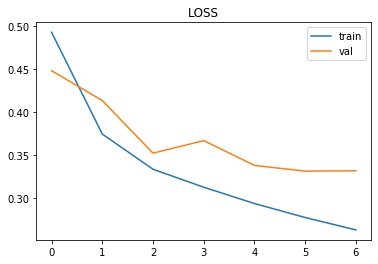

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','val'])
plt.title("LOSS")
plt.show()

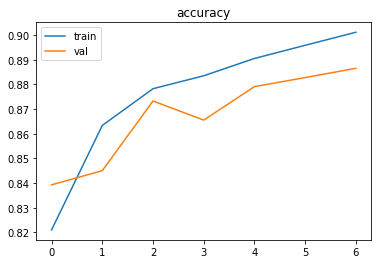

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','val'])
plt.title("accuracy")
plt.show()